In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 전체 게임 데이터에서 LCK 데이터 추출
match_data = pd.read_csv('2021_LoL_esports_match_data_from_OraclesElixir_20210526.csv')
match_data = match_data[match_data['league']=='LCK']
match_data.head()

,Unnamed: 0,gameid,datacompleteness,url,league,year,split,playoffs,date,game,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,1548,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,1/13/2021 7:00,1,...,130,1548,1464,-8,3,1,0,0,0,4
1,1549,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,1/13/2021 7:00,1,...,110,903,1005,12,1,3,1,0,0,0
2,1550,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,1/13/2021 7:00,1,...,167,-261,-225,-20,1,1,0,0,0,0
3,1551,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,1/13/2021 7:00,1,...,145,-44,-205,-4,0,2,0,0,1,0
4,1552,ESPORTSTMNT01/1690520,complete,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2021,Spring,0,1/13/2021 7:00,1,...,16,-55,-258,6,1,0,0,1,0,2


In [3]:
# 각 라인별 챔피언 풀 만들기
top_champions_data = match_data[match_data['position']=='top']['champion'].value_counts()
top_champions = DataFrame(top_champions_data)
top_champions.columns =['times played']
top_champions = top_champions[top_champions['times played']>=3]

jng_champions_data = match_data[match_data['position']=='jng']['champion'].value_counts()
jng_champions = DataFrame(jng_champions_data)
jng_champions.columns =['times played']
jng_champions = jng_champions[jng_champions['times played']>=2]

mid_champions_data = match_data[match_data['position']=='mid']['champion'].value_counts()
mid_champions = DataFrame(mid_champions_data)
mid_champions.columns =['times played']
mid_champions = mid_champions[mid_champions['times played']>=4]

bot_champions_data = match_data[match_data['position']=='bot']['champion'].value_counts()
bot_champions = DataFrame(bot_champions_data)
bot_champions.columns =['times played']
bot_champions = bot_champions[bot_champions['times played']>=3]

sup_champions_data = match_data[match_data['position']=='sup']['champion'].value_counts()
sup_champions = DataFrame(sup_champions_data)
sup_champions.columns =['times played']
sup_champions = sup_champions[sup_champions['times played']>=2]

In [4]:
# 챔피언 라인 확인 함수
def check_lane(champion_name):
    possible_lane = []
    if champion_name in top_champions.index:
        possible_lane.append('top')
    if champion_name in jng_champions.index:
        possible_lane.append('jng')
    if champion_name in mid_champions.index:
        possible_lane.append('mid')
    if champion_name in bot_champions.index:
        possible_lane.append('bot')
    if champion_name in sup_champions.index:
        possible_lane.append('sup')
    return possible_lane

In [5]:
# 전체 매치 데이터에서 프레딧 브리온의 벤 리스트 가져오기
BRO_totalmatch = int(len(match_data[match_data['team']=='Fredit BRION'])/6)
BRO_ban = match_data[match_data['team']=='Fredit BRION'][['ban1', 'ban2','ban3','ban4','ban5']][::6]
BRO_ban = BRO_ban.set_index([pd.Index(np.arange(BRO_totalmatch)+1)])
BRO_ban

,ban1,ban2,ban3,ban4,ban5
1,Sett,Gragas,Olaf,Nautilus,Yone
2,Sett,Renekton,Kai'Sa,Galio,Twisted Fate
3,Pantheon,Taliyah,Rumble,Gnar,Gragas
4,Rell,Gragas,Taliyah,Camille,Orianna
5,Pantheon,Taliyah,Nidalee,Camille,Renekton
6,Nidalee,Taliyah,Pantheon,Maokai,Gangplank
7,Taliyah,Nidalee,Syndra,Aatrox,Rell
8,Taliyah,Nidalee,Olaf,Lillia,Hecarim
9,Renekton,Taliyah,Kai'Sa,Kalista,Twisted Fate
10,Renekton,Pantheon,Camille,Samira,Senna


In [6]:
# 프레딧 브리온의 벤 리스트에서 각 벤순서별, 벤 페이즈 별 벤 카드 사용 라인 백분율/확율 추출하기
BRO_ban_spread = DataFrame(0, columns=BRO_ban.columns, index=['top','jng','mid','bot','sup'])
for ban in ['ban1', 'ban2','ban3','ban4','ban5']:
    cur_data = DataFrame(BRO_ban[ban].value_counts())
    for champion_name in cur_data.index:
        champion_lane = check_lane(champion_name)
        champion_timespick = cur_data.loc[champion_name][ban]
        for lane in champion_lane:
            BRO_ban_spread.loc[lane][ban] += champion_timespick

BRO_ban_spread = BRO_ban_spread/BRO_ban_spread.sum()            
BRO_ban_spread['phase1'] = BRO_ban_spread['ban1'] + BRO_ban_spread['ban2'] + BRO_ban_spread['ban3']
BRO_ban_spread['phase2'] = BRO_ban_spread['ban4'] + BRO_ban_spread['ban5']
BRO_ban_spread

,ban1,ban2,ban3,ban4,ban5,phase1,phase2
top,0.192308,0.266667,0.219512,0.348837,0.295455,0.678487,0.644292
jng,0.250000,0.244444,0.414634,0.116279,0.136364,0.909079,0.252643
mid,0.211538,0.177778,0.170732,0.255814,0.363636,0.560048,0.619450
bot,0.153846,0.155556,0.097561,0.162791,0.090909,0.406963,0.253700
sup,0.192308,0.155556,0.097561,0.116279,0.113636,0.445424,0.229915


In [7]:
# 위와 같은 데이터 추출을 담원 게이밍 데이터로 반복
DK_totalmatch = int(len(match_data[match_data['team']=='DWG KIA'])/6)
DK_ban = match_data[match_data['team']=='DWG KIA'][['ban1', 'ban2','ban3','ban4','ban5']][::6]
DK_ban = DK_ban.set_index([pd.Index(np.arange(DK_totalmatch)+1)])

In [8]:
DK_ban_spread = DataFrame(0, columns=DK_ban.columns, index=['top','jng','mid','bot','sup'])
for ban in ['ban1', 'ban2','ban3','ban4','ban5']:
    cur_data = DataFrame(DK_ban[ban].value_counts())
    for champion_name in cur_data.index:
        champion_lane = check_lane(champion_name)
        champion_timespick = cur_data.loc[champion_name][ban]
        for lane in champion_lane:
            DK_ban_spread.loc[lane][ban] += champion_timespick

DK_ban_spread = DK_ban_spread/DK_ban_spread.sum()            
DK_ban_spread['phase1'] = DK_ban_spread['ban1'] + DK_ban_spread['ban2'] + DK_ban_spread['ban3']
DK_ban_spread['phase2'] = DK_ban_spread['ban4'] + DK_ban_spread['ban5']
DK_ban_spread

,ban1,ban2,ban3,ban4,ban5,phase1,phase2
top,0.105263,0.196970,0.303571,0.254545,0.46,0.605804,0.714545
jng,0.122807,0.090909,0.267857,0.090909,0.02,0.481573,0.110909
mid,0.210526,0.272727,0.125000,0.436364,0.32,0.608254,0.756364
bot,0.175439,0.257576,0.071429,0.072727,0.06,0.504443,0.132727
sup,0.385965,0.181818,0.232143,0.145455,0.14,0.799926,0.285455


In [9]:
# 위와 같은 데이터 추출을 LCK 모든 팀 데이터로 반복
lck_totalmatch = int(len(match_data)/12)
lck_ban = match_data[match_data['position']!='team'][['ban1', 'ban2','ban3','ban4','ban5']][::5]
lck_ban = lck_ban.set_index([pd.Index(np.arange(lck_totalmatch*2)+1)])

In [10]:
lck_ban_spread = DataFrame(0, columns=lck_ban.columns, index=['top','jng','mid','bot','sup'])
for ban in ['ban1', 'ban2','ban3','ban4','ban5']:
    cur_data = DataFrame(lck_ban[ban].value_counts())
    for champion_name in cur_data.index:
        champion_lane = check_lane(champion_name)
        champion_timespick = cur_data.loc[champion_name][ban]
        for lane in champion_lane:
            lck_ban_spread.loc[lane][ban] += champion_timespick

lck_ban_spread /=lck_ban_spread.sum()
lck_ban_spread['phase1'] = lck_ban_spread['ban1'] + lck_ban_spread['ban2'] + lck_ban_spread['ban3']
lck_ban_spread['phase2'] = lck_ban_spread['ban4'] + lck_ban_spread['ban5']
lck_ban_spread

,ban1,ban2,ban3,ban4,ban5,phase1,phase2
top,0.155932,0.189983,0.187845,0.288848,0.341198,0.533760,0.630046
jng,0.184746,0.255613,0.331492,0.062157,0.063521,0.771851,0.125678
mid,0.262712,0.207254,0.197053,0.329068,0.292196,0.667019,0.621264
bot,0.142373,0.129534,0.116022,0.091408,0.087114,0.387929,0.178522
sup,0.254237,0.217617,0.167587,0.228519,0.215971,0.639441,0.444490


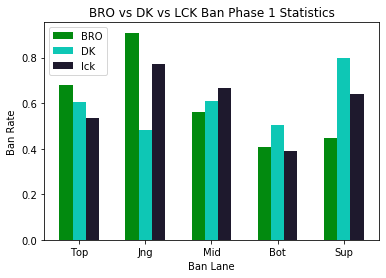

In [11]:
# BRO, DK, LCK 벤 페이즈 1 데이터 비교 차트
axis = ['Top','Jng','Mid','Bot','Sup']
BRO_statistics = BRO_ban_spread['phase1'].to_list()
lck_statistics = lck_ban_spread['phase1'].to_list()
DK_statistics = DK_ban_spread['phase1'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.2, label='BRO', color='#028A0F')
plt.bar(x_axis, DK_statistics, 0.2, label='DK', color='#0EC7B5')
plt.bar(x_axis+0.2, lck_statistics, 0.2, label='lck', color='#1E192D')

plt.xticks(x_axis, axis)
plt.xlabel('Ban Lane')
plt.ylabel('Ban Rate')
plt.title('BRO vs DK vs LCK Ban Phase 1 Statistics')
plt.legend()
plt.show()

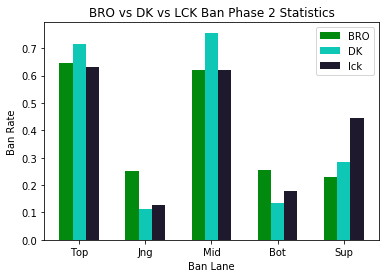

In [12]:
# BRO, DK, LCK 벤 페이즈 2 데이터 비교 차트
axis = ['Top','Jng','Mid','Bot','Sup']
BRO_statistics = BRO_ban_spread['phase2'].to_list()
lck_statistics = lck_ban_spread['phase2'].to_list()
DK_statistics = DK_ban_spread['phase2'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.2, label='BRO',color='#028A0F')
plt.bar(x_axis, DK_statistics, 0.2, label='DK', color='#0EC7B5')
plt.bar(x_axis+0.2, lck_statistics, 0.2, label='lck', color='#1E192D')

plt.xticks(x_axis, axis)
plt.xlabel('Ban Lane')
plt.ylabel('Ban Rate')
plt.title('BRO vs DK vs LCK Ban Phase 2 Statistics')
plt.legend()
plt.show()

In [13]:
#  담원 기아, 프레딧 브리온 픽 데이터 가져오기
pick_data = pd.read_csv('BROandDKbanpick.xlsx')

# 팀별, 전영별 분류 밑 인덱싱
BRO_pick_data = pick_data[pick_data['team']=='Fredit BRION']
DK_pick_data = pick_data[pick_data['team']=='DWG KIA']

BRO_pick_data_blue = BRO_pick_data[BRO_pick_data['side']=='Blue']
BRO_pick_data_red = BRO_pick_data[BRO_pick_data['side']=='Red']
DK_pick_data_blue = DK_pick_data[DK_pick_data['side']=='Blue']
DK_pick_data_red = DK_pick_data[DK_pick_data['side']=='Red']

BRO_pick_data_blue = BRO_pick_data_blue.set_index([pd.Index(np.arange(len(BRO_pick_data_blue))+1)])
BRO_pick_data_red = BRO_pick_data_red.set_index([pd.Index(np.arange(len(BRO_pick_data_red))+1)])
DK_pick_data_blue = DK_pick_data_blue.set_index([pd.Index(np.arange(len(DK_pick_data_blue))+1)])
DK_pick_data_red = DK_pick_data_red.set_index([pd.Index(np.arange(len(DK_pick_data_red))+1)])

In [19]:
# 팀별 각 픽순서별 픽한 라인 분포 표 만들기
Index = ['top','jng','mid','bot','sup']
BRO_pick_spread_blue = DataFrame(0, columns=BRO_pick_data_blue.columns[2:], index=Index)
BRO_pick_spread_red = DataFrame(0, columns=BRO_pick_data_red.columns[2:], index=Index)

DK_pick_spread_blue = DataFrame(0, columns=DK_pick_data_blue.columns[2:], index=Index)
DK_pick_spread_red = DataFrame(0, columns=DK_pick_data_red.columns[2:], index=Index)

Picks = ['pick1', 'pick2','pick3','pick4','pick5']
for pick in Picks:
    cur_data = DataFrame(BRO_pick_data_blue[pick].value_counts())
    for champion_name in cur_data.index:
        champion_lane = check_lane(champion_name)
        champion_timespick = cur_data.loc[champion_name][pick]
        for lane in champion_lane:
            BRO_pick_spread_blue.loc[lane][pick] += champion_timespick
            
for pick in Picks:
    cur_data = DataFrame(BRO_pick_data_red[pick].value_counts())
    for champion_name in cur_data.index:
        champion_lane = check_lane(champion_name)
        champion_timespick = cur_data.loc[champion_name][pick]
        for lane in champion_lane:
            BRO_pick_spread_red.loc[lane][pick] += champion_timespick
            
for pick in Picks:
    cur_data = DataFrame(DK_pick_data_blue[pick].value_counts())
    for champion_name in cur_data.index:
        champion_lane = check_lane(champion_name)
        champion_timespick = cur_data.loc[champion_name][pick]
        for lane in champion_lane:
            DK_pick_spread_blue.loc[lane][pick] += champion_timespick
            
for pick in Picks:
    cur_data = DataFrame(DK_pick_data_red[pick].value_counts())
    for champion_name in cur_data.index:
        champion_lane = check_lane(champion_name)
        champion_timespick = cur_data.loc[champion_name][pick]
        for lane in champion_lane:
            DK_pick_spread_red.loc[lane][pick] += champion_timespick
            
# 픽 순서별 픽 포지션 백분율로 변환
BRO_pick_spread_blue /= BRO_pick_spread_blue.sum()
BRO_pick_spread_red /= BRO_pick_spread_red.sum()
DK_pick_spread_blue /= DK_pick_spread_blue.sum()
DK_pick_spread_red /= DK_pick_spread_red.sum()

# 픽 페이즈별 정리
BRO_pick_spread_blue['Pick 2+3'] = BRO_pick_spread_blue['pick2'] + BRO_pick_spread_blue['pick3']
BRO_pick_spread_blue['Pick 4+5'] = BRO_pick_spread_blue['pick4'] + BRO_pick_spread_blue['pick5']
DK_pick_spread_blue['Pick 2+3'] = DK_pick_spread_blue['pick2'] + DK_pick_spread_blue['pick3']
DK_pick_spread_blue['Pick 4+5'] = DK_pick_spread_blue['pick4'] + DK_pick_spread_blue['pick5']

BRO_pick_spread_red['Pick 1+2'] = BRO_pick_spread_red['pick1'] + BRO_pick_spread_red['pick2']
DK_pick_spread_red['Pick 1+2'] = DK_pick_spread_red['pick1'] + DK_pick_spread_red['pick2']

BRO_pick_spread_blue

,pick1,pick2,pick3,pick4,pick5,Pick 2+3,Pick 4+5
top,0.000000,0.10,0.095238,0.434783,0.260870,0.195238,0.695652
jng,0.523810,0.35,0.047619,0.000000,0.043478,0.397619,0.043478
mid,0.142857,0.10,0.190476,0.304348,0.217391,0.290476,0.521739
bot,0.142857,0.40,0.285714,0.043478,0.000000,0.685714,0.043478
sup,0.190476,0.05,0.380952,0.217391,0.478261,0.430952,0.695652


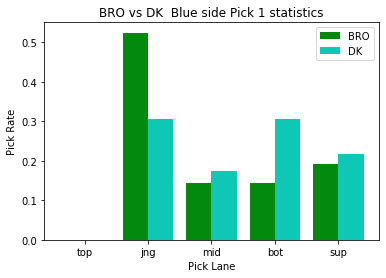

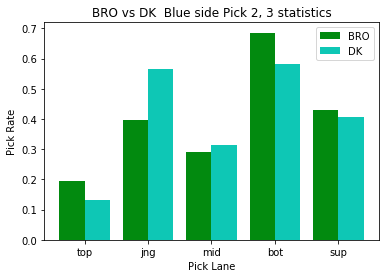

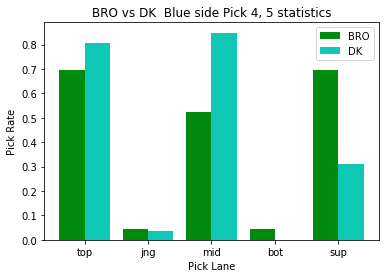

In [15]:
# 블루진영 1픽 비교
axis = ['top','jng','mid','bot','sup']
BRO_statistics = BRO_pick_spread_blue['pick1'].to_list()
DK_statistics = DK_pick_spread_blue['pick1'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.4, label='BRO', color='#028A0F')
plt.bar(x_axis+0.2, DK_statistics, 0.4, label='DK', color='#0EC7B5')

plt.xticks(x_axis, axis)
plt.xlabel('Pick Lane')
plt.ylabel('Pick Rate')
plt.title('BRO vs DK  Blue side Pick 1 statistics')
plt.legend()
plt.show()

# 블루진영 2, 3픽 비교
BRO_statistics = BRO_pick_spread_blue['Pick 2+3'].to_list()
DK_statistics = DK_pick_spread_blue['Pick 2+3'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.4, label='BRO', color='#028A0F')
plt.bar(x_axis+0.2, DK_statistics, 0.4, label='DK', color='#0EC7B5')

plt.xticks(x_axis, axis)
plt.xlabel('Pick Lane')
plt.ylabel('Pick Rate')
plt.title('BRO vs DK  Blue side Pick 2, 3 statistics')
plt.legend()
plt.show()

# 블루진영 4, 5픽 비교
BRO_statistics = BRO_pick_spread_blue['Pick 4+5'].to_list()
DK_statistics = DK_pick_spread_blue['Pick 4+5'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.4, label='BRO', color='#028A0F')
plt.bar(x_axis+0.2, DK_statistics, 0.4, label='DK', color='#0EC7B5')

plt.xticks(x_axis, axis)
plt.xlabel('Pick Lane')
plt.ylabel('Pick Rate')
plt.title('BRO vs DK  Blue side Pick 4, 5 statistics')
plt.legend()
plt.show()

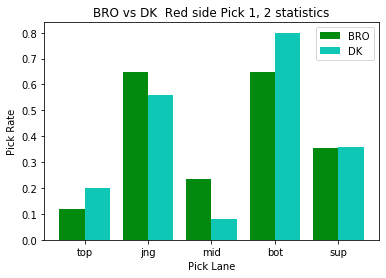

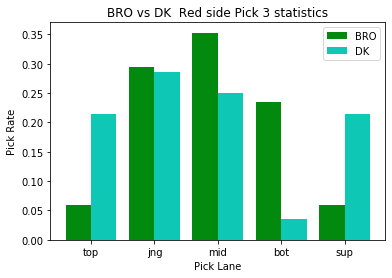

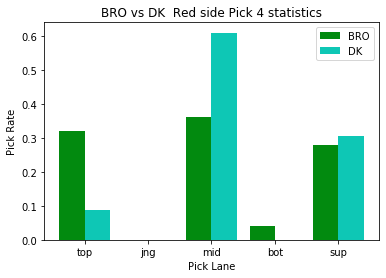

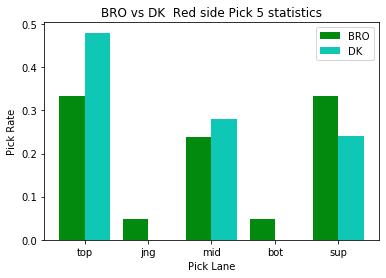

In [16]:
# 레드 진영 1, 2픽 비교
axis = ['top','jng','mid','bot','sup']
BRO_statistics = BRO_pick_spread_red['Pick 1+2'].to_list()
DK_statistics = DK_pick_spread_red['Pick 1+2'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.4, label='BRO', color='#028A0F')
plt.bar(x_axis+0.2, DK_statistics, 0.4, label='DK', color='#0EC7B5')

plt.xticks(x_axis, axis)
plt.xlabel('Pick Lane')
plt.ylabel('Pick Rate')
plt.title('BRO vs DK  Red side Pick 1, 2 statistics')
plt.legend()
plt.show()

# 레드 진영 3픽 비교
BRO_statistics = BRO_pick_spread_red['pick3'].to_list()
DK_statistics = DK_pick_spread_red['pick3'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.4, label='BRO', color='#028A0F')
plt.bar(x_axis+0.2, DK_statistics, 0.4, label='DK', color='#0EC7B5')

plt.xticks(x_axis, axis)
plt.xlabel('Pick Lane')
plt.ylabel('Pick Rate')
plt.title('BRO vs DK  Red side Pick 3 statistics')
plt.legend()
plt.show()

# 레드 진영 4픽 비교
BRO_statistics = BRO_pick_spread_red['pick4'].to_list()
DK_statistics = DK_pick_spread_red['pick4'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.4, label='BRO', color='#028A0F')
plt.bar(x_axis+0.2, DK_statistics, 0.4, label='DK', color='#0EC7B5')

plt.xticks(x_axis, axis)
plt.xlabel('Pick Lane')
plt.ylabel('Pick Rate')
plt.title('BRO vs DK  Red side Pick 4 statistics')
plt.legend()
plt.show()

# 레드 진영 5픽 비교
BRO_statistics = BRO_pick_spread_red['pick5'].to_list()
DK_statistics = DK_pick_spread_red['pick5'].to_list()

x_axis = np.arange(len(axis))

plt.bar(x_axis-0.2, BRO_statistics, 0.4, label='BRO', color='#028A0F')
plt.bar(x_axis+0.2, DK_statistics, 0.4, label='DK', color='#0EC7B5')

plt.xticks(x_axis, axis)
plt.xlabel('Pick Lane')
plt.ylabel('Pick Rate')
plt.title('BRO vs DK  Red side Pick 5 statistics')
plt.legend()
plt.show()

In [17]:
pd.set_option('display.max_rows', 500)